# Pulling out some demographic stats to analyse

In [1]:
from pandas import read_csv, concat
from matplotlib import pyplot as plt

import seaborn as sns
import numpy as np
import os

In [2]:
data_folder = "../../data/prepared_data/"

os.listdir(data_folder)

['unpd_combined_indicators.csv',
 'gbd_world_pop.csv',
 'date_for_8bn.csv',
 'gbd_scenarios_pop.csv',
 'unpd_world_indicators.csv',
 'gbd_world_births.csv']

In [3]:
dates_8bn = read_csv(data_folder + "date_for_8bn.csv")
gbd_scenarios_pop = read_csv(data_folder + "gbd_scenarios_pop.csv")
unpd_combined_indicators = read_csv(data_folder + "unpd_combined_indicators.csv")
unpd_combined_indicators["val"] = unpd_combined_indicators.TPopulation1July*1_000

## Median ages

In [6]:
un_matched_dates = dates_8bn\
    .merge(unpd_combined_indicators,
           "left",
           left_on=["scenario_name","year_id"],
           right_on=["Variant","Time"])\
    .loc[:,["scenario_name","year_id","MedianAgePop"]]

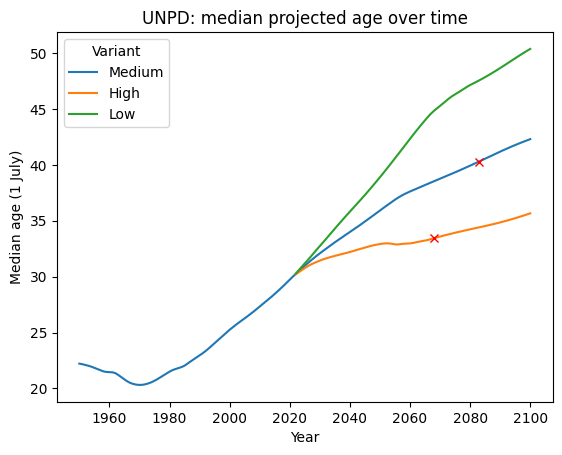

In [9]:
sns.lineplot(data=unpd_combined_indicators[unpd_combined_indicators.Location=="World"],
             x="Time",
             y="MedianAgePop",
             hue="Variant")
plt.title("UNPD: median projected age over time")
plt.xlabel("Year")
plt.ylabel("Median age (1 July)")
plt.plot(un_matched_dates.year_id, un_matched_dates.MedianAgePop, "rx")
plt.show()

## Plotting uncertainties on GBD 

Text(0.5, 1.0, 'GBD population projection with uncertainties')

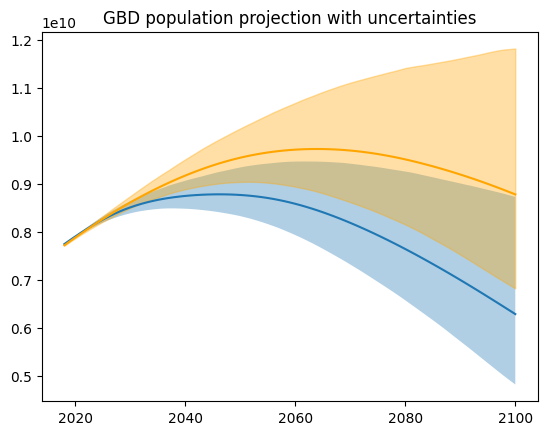

In [20]:
gbd_global = gbd_scenarios_pop[gbd_scenarios_pop.location_name=="Global"]

fig, ax = plt.subplots()
ax.plot(gbd_global[gbd_global.scenario_name=="SDG Met Need and Education"].year_id,
       gbd_global[gbd_global.scenario_name=="SDG Met Need and Education"].val)
ax.fill_between(gbd_global[gbd_global.scenario_name=="SDG Met Need and Education"].year_id,
               gbd_global[gbd_global.scenario_name=="SDG Met Need and Education"].lower,
               gbd_global[gbd_global.scenario_name=="SDG Met Need and Education"].upper,
               alpha=0.35)


ax.plot(gbd_global[gbd_global.scenario_name=="Reference"].year_id,
       gbd_global[gbd_global.scenario_name=="Reference"].val,
       color="orange")
ax.fill_between(gbd_global[gbd_global.scenario_name=="Reference"].year_id,
               gbd_global[gbd_global.scenario_name=="Reference"].lower,
               gbd_global[gbd_global.scenario_name=="Reference"].upper,
               alpha=0.35, color="orange")

ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("GBD population projection with uncertainties")

# TODO: add in N8B and compute for scenarios (interpolation between should be reasonable/correct)